In [ ]:
import torch

In [ ]:
def v6():  # Тимофей
    x, y, z = 1, 1, -1
    result = torch.sin(x * torch.cos(y * torch.exp(z))) * (x - y + 1 / z)

Пример выполнения шестого задания (v6).

In [ ]:
x, y, z = 1, 1, -1
x = torch.tensor(x, requires_grad=True, dtype=torch.float32)
y = torch.tensor(y, requires_grad=True, dtype=torch.float32)
z = torch.tensor(z, requires_grad=True, dtype=torch.float32)
result = torch.sin(x * torch.cos(y * torch.exp(z))) * (x - y + 1 / z)
result.backward()

print(result, x.grad, y.grad, z.grad)

tensor(-0.8035, grad_fn=<MulBackward0>) tensor(0.2479) tensor(-0.7247) tensor(-0.7247)


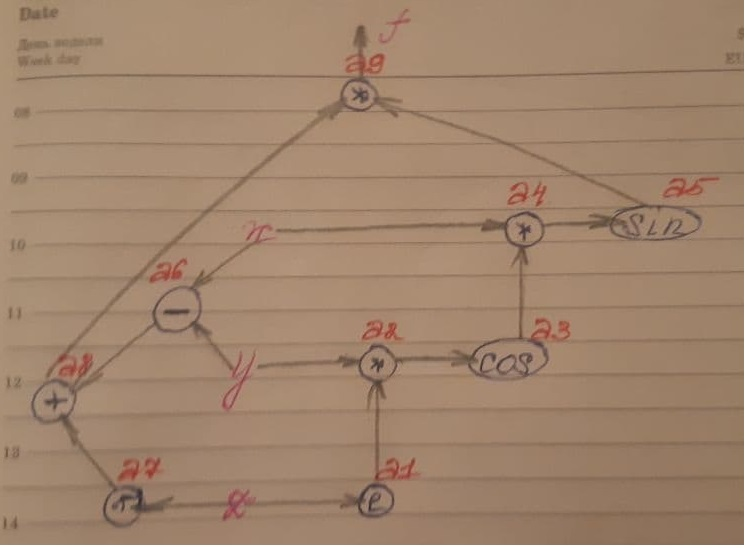

In [ ]:
a1 = torch.exp(z)
a2 = y * a1
a3 = torch.cos(a2)
a4 = x * a3
a5 = torch.sin(a4)
a6 = x - y
a7 = 1 / z
a8 = a6 + a7
a9 = a5 * a8

print(a9)

tensor(-0.8035, grad_fn=<MulBackward0>)


df/da9 = 1.0  
df/da8 = df/da9 * da9/da8 = 1.0 * a5  
df/da7 = df/da8 * da8/da7 = a5 * 1  
df/da6 = df/da8 * da8/da6 = a5 * 1  
df/da5 = df/da9 * da9/da5 = 1.0 * a8  
df/da4 = df/da5 * da5/da4 = a8 * cos(a4)  
df/da3 = df/da4 * da4/da3 = a8 * cos(a4) * x  
df/da2 = df/da3 * da3/da2 = - a8 * cos(a4) * x * sin(a2)  
df/da1 = df/da2 * da2/da1 = - a8 * cos(a4) * x * sin(a2) * y  
  
dx = df/da6 * da6/dx + df/da4 * da4/dx = df/da6 * 1 +  df/da4 * a3  
dy = df/da6 * da6/dy + df/da2 * da2/dy = df/da6 * (-1) + df/da2 * a1  
dz = df/da7 * da7/dz + df/da1 * da1/dz = df/da7 * (-1) * pow(z, -2) + df/da1 *  exp(z)

In [ ]:
da9 = 1.0
da8 = da9 * a5
da7 = da8 * 1
da6 = da8 * 1
da5 = da9 * a8
da4 = da5 * torch.cos(a4)
da3 = da4 * x
da2 = da3 * (-torch.sin(a2))
da1 = da2 * y

dx = da4 * a3 + da6
dy = da2 * a1 - da6
dz = da1 * torch.exp(z) - da7 * 1 / (z ** 2)

print(f"tensor({dx.item():.4f}) tensor({dy.item():.4f}) tensor({dz.item():.4f})") 
print(x.grad, y.grad, z.grad)

tensor(0.2479) tensor(-0.7247) tensor(-0.7247)
tensor(0.2479) tensor(-0.7247) tensor(-0.7247)


In [ ]:
def v8():  # Татьяна
    x, y, z = 2, 1, 0
    result = z * (x ** 2 + (y ** 2) * sin(x + y + z)) / torch.exp(x - y)

In [ ]:
x, y, z = 2, 1, 0
x = torch.tensor(x, requires_grad=True, dtype=torch.float32)
y = torch.tensor(y, requires_grad=True, dtype=torch.float32)
z = torch.tensor(z, requires_grad=True, dtype=torch.float32)
result = z * (x ** 2 + (y ** 2) * torch.sin(x + y + z)) / torch.exp(x - y)
result.backward()

print(result, x.grad, y.grad, z.grad)

tensor(0., grad_fn=<DivBackward0>) tensor(0.) tensor(0.) tensor(1.5234)


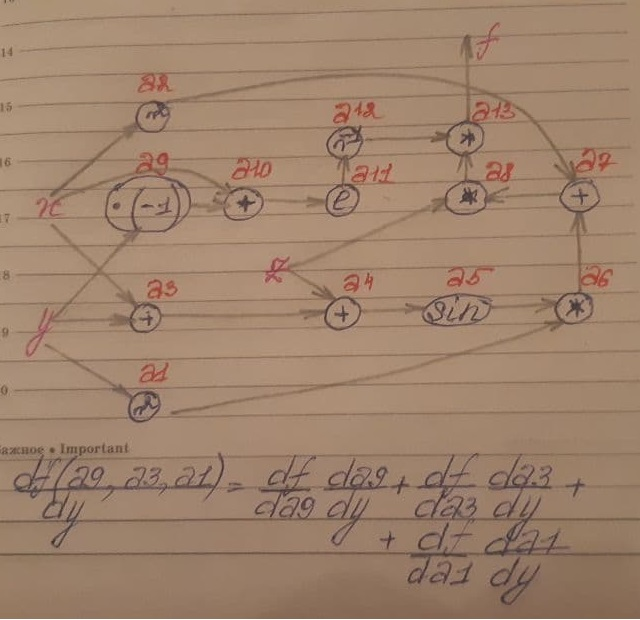

In [ ]:
a1 = torch.pow(y, 2)
a2 = torch.pow(x, 2)
a3 = x + y
a4 = a3 + z
a5 = torch.sin(a4)
a6 = a5 * a1
a7 = a6 + a2
a8 = a7 * z
a9 = (-1) * y 
a10 = a9 + x
a11 = torch.exp(a10)
a12 = torch.pow(a11, -1)
a13 = a12 * a8
print(a13)

tensor(0., grad_fn=<MulBackward0>)


df/da13 = 1.0  
df/da12 = df/da13 * da13/da12 = 1.0 * a8  
df/da11 = df/da12 * da12/da11 = a8 * (-1) * pow(a11, -2)  
df/da10 = df/da11 * da11/da10 = exp(a10) - pow(a11, -2)  
df/da9 = df/da10 * da10/da9 = df/da10 * 1  
df/da8 = df/da13 * da13/da8 = df/da13 * a12  
df/da7 = df/da8 * da8/da7 = df/da8 * z  
df/da6 = df/da7 * da7/da6 = df/da7 * 1  
df/da5 = df/da6 * da6/da5 = df/da6 * a1  
df/da4 = df/da5 * da5/da4 = df/da5 * cos(a4)  
df/da3 = df/da4 * da4/da3 = df/da4 * 1  
df/da2 = df/da7 * da7/da2 = df/da7 * 1  
df/da1 = df/da6 * da6/da1 = df/da6 * a5
  
// См. пример https://ru.wikipedia.org/wiki/Дифференцирование_сложной_функции  
dx = df/da2 * da2/dx + df/da3 * da3/dx + df/da10 * da10/dx =  
........df/da2 * 2 * x + df/da3 * 1 + df/da10 * 1  
dy = df/da1 * da1/dy + df/da3 * da3/dy + df/da9 * da9/dy =  
........df/da1 * 2 * y + df/da3 * 1 + df/da9 * (-1)  
dz = df/da4 * da4/dz + df/da8 * da8/dz =  
........df/da4 * 1 + df/da8 * a7  

In [ ]:
da13 = 1.0
da12 = da13 * a8
da11 = da12 * (-1) * torch.pow(a11, -2)
da10 = da11 * torch.exp(a10)
da9 = da10 * 1
da8 = da13 * a12 
da7 = da8 * z
da6 = da7 * 1
da5 = da6 * a1
da4 = da5 * torch.cos(a4)
da3 = da4
da2 = da7
da1 = da6 * a5

dx = da2 * 2 * x + da3 * 1 + da10 * 1  
dy = da1 * 2 * y + da3 * 1 + da9 * (-1)  
dz = da4 * 1 + da8 * a7
print(f"tensor({dx.item():.4f}) tensor({dy.item():.4f}) tensor({dz.item():.4f})") 
print(x.grad, y.grad, z.grad)

tensor(0.0000) tensor(0.0000) tensor(1.5234)
tensor(0.) tensor(0.) tensor(1.5234)
